# IPHONE ANALYSIS WITH PYTHON

## Python Libraries :
     Pandas  Numpy Plotly.express  Plotly.graph_objects

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

## Load Data Set

In [2]:
df = pd.read_csv('apple_products.csv')
pd.set_option('display.max.column', 11)
# pd.set_option('display.max.row', 11)

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


### Conclusion 
- DataFrame is in Tabular form 
- Rows : 62
- Columns : 11
- Each row holds import details related to iphone sales

###  Checking The Null Values ,Duplicate 

In [4]:
df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

- No Null value found  in Dataset

In [5]:
df.duplicated().sum()

np.int64(0)

- No Duplicate value found in Dataset

In [6]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


## top 10 highest-rated iPhones on Flipkart in India?

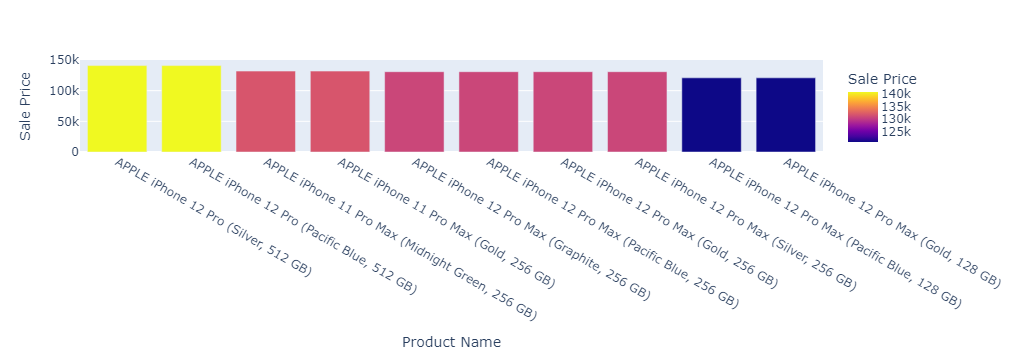

In [43]:
highest_rated = df.sort_values(by='Sale Price' , ascending=False).head(10)
fig =px.bar(data_frame=highest_rated , y ='Sale Price' , x='Product Name' , color='Sale Price' ,range_y=[0, 150000] )
fig.show()

### conclusion
- Highest Products are: 
    - APPLE iPhone 12 Pro (Silver, 512 GB)
    - APPLE iPhone 12 Pro (Pacific Blue, 512 GB)
    - APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
    - APPLE iPhone 11 Pro Max (Gold, 256 GB)
    - APPLE iPhone 12 Pro Max (Graphite, 256 GB)
    - APPLE iPhone 12 Pro Max (Pacific Blue, 256 GB)
    - APPLE iPhone 12 Pro Max (Gold, 256 GB)
    - APPLE iPhone 12 Pro Max (Silver, 256 GB)
    - APPLE iPhone 12 Pro Max (Pacific Blue, 128 GB)
    - APPLE iPhone 12 Pro Max (Gold, 128 GB)

      
- Highest Product Ranges in : [140900 , 120900]

## How many ratings do the highest-rated iPhones on Flipkart have?

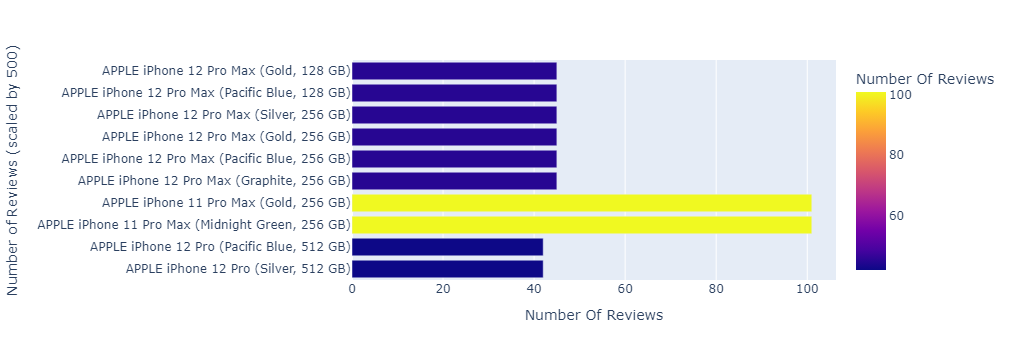

In [53]:
product_name= highest_rated['Product Name'].value_counts()
labels = product_name.index
counts = highest_rated['Number Of Reviews']
fig = px.bar(data_frame=highest_rated , y=labels, x =counts ,  labels={'x': 'Product Name', 'y': 'Number of Reviews (scaled by 500)'} ,color='Number Of Reviews')
fig.show()

### conclusion
- Highest rated Iphone receive 101 reviews

## What is the relationship between the sale price of iPhones and the number of ratings on Flipkart?

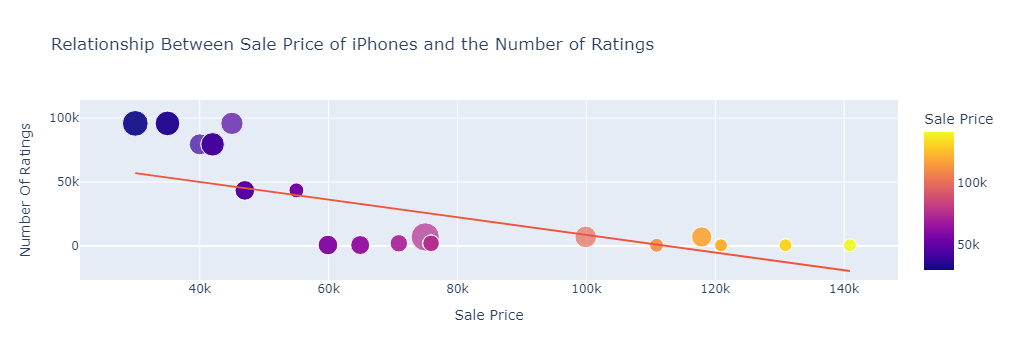

In [69]:
fig = px.scatter(
    data_frame=df,
    x='Sale Price',
    y='Number Of Ratings',
    size='Discount Percentage',
    trendline='ols',
    title='Relationship Between Sale Price of iPhones and the Number of Ratings',
    color='Sale Price'
    
)
fig.show()


### conclusion 
- As Sale Price is increasing the Number of Ratings Decreases
- Highest Rating : 95.807k at Sale Price :29999
- Lowest Rating : 545 at Sale Price : 140900
- The Bigger the Circle , the more is Discount percentage 

## What is the relationship between the discount % of iPhones and the number of ratings on Flipkart?

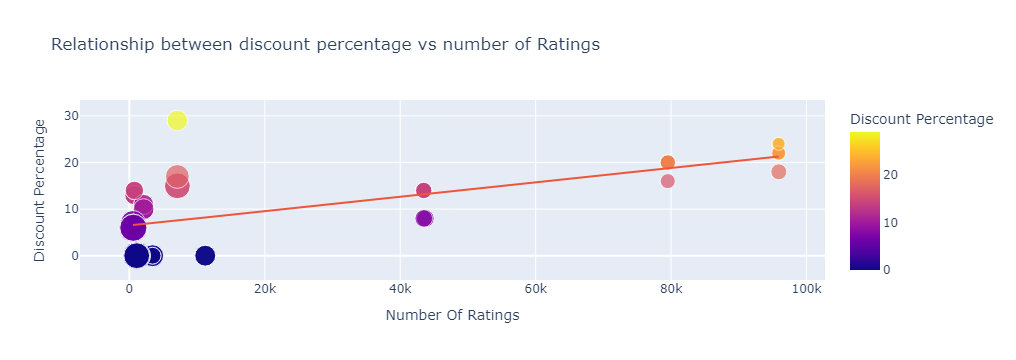

In [80]:
fig = px.scatter(data_frame=df ,
                 y=df['Discount Percentage'] ,
                 x=df['Number Of Ratings'] ,
                 size='Sale Price',
                 trendline='ols',
                title = 'Relationship between discount percentage vs number of Ratings',
                color = 'Discount Percentage')
fig.show()

### conclusion 
- As the number of  ratings increase, the discount percentage appears to increase as well.
- The Bigger the circle more the is Sale Price via versa

## figure out the least expensive and most expensive iPhones in the Indian market with  specifications?

In [12]:
# least_expensive= df.sort_values(by='Sale Price' , ascending=True).head(1)
# least_expensive

df.iloc[df['Sale Price'].idxmax()]

Product Name                        APPLE iPhone 12 Pro (Silver, 512 GB)
Product URL            https://www.flipkart.com/apple-iphone-12-pro-s...
Brand                                                              Apple
Sale Price                                                        140900
Mrp                                                               149900
Discount Percentage                                                    6
Number Of Ratings                                                    542
Number Of Reviews                                                     42
Upc                                                     MOBFWBYZ5UY6ZBVA
Star Rating                                                          4.5
Ram                                                                 4 GB
Name: 24, dtype: object

In [68]:
# most_expensive= df.sort_values(by='Sale Price' , ascending=False).head(1)
# most_expensive
df.iloc[df['Sale Price'].idxmin()]

Product Name                              APPLE iPhone SE (White, 64 GB)
Product URL            https://www.flipkart.com/apple-iphone-se-white...
Brand                                                              Apple
Sale Price                                                         29999
Mrp                                                                39900
Discount Percentage                                                   24
Number Of Ratings                                                  95807
Number Of Reviews                                                   8154
Upc                                                     MOBFWQ6BGWDVGF3E
Star Rating                                                          4.5
Ram                                                                 2 GB
Name: 52, dtype: object